In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('GOOGL.csv') 

In [3]:
df.dropna(inplace=True)

In [4]:
df.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-10-2022,99.830002,101.930000,98.800003,101.430000,101.430000,22176900
1,06-10-2022,100.680000,102.930000,100.589996,101.419998,101.419998,22324000
2,07-10-2022,99.849998,100.529999,98.300003,98.680000,98.680000,27502800
3,10-10-2022,99.000000,99.099998,97.010002,97.860001,97.860001,18225100
4,11-10-2022,97.430000,99.250000,96.309998,97.180000,97.180000,26507100
5,12-10-2022,97.300003,98.750000,96.739998,97.559998,97.559998,21876400
6,13-10-2022,95.150002,99.779999,94.379997,99.059998,99.059998,34574500
7,14-10-2022,99.989998,100.690002,96.370003,96.559998,96.559998,25410700
8,17-10-2022,98.860001,100.930000,98.830002,99.970001,99.970001,28419200
9,18-10-2022,103.129997,103.470001,99.970001,100.769997,100.769997,24060700


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,109.065578,110.571673,107.884900,109.254940,109.254940,3.331596e+07
std,15.827003,15.877364,15.820469,15.842716,15.842716,1.345568e+07
min,85.400002,86.519997,83.339996,83.430000,83.430000,9.701400e+06
25%,95.399998,96.930000,94.130001,95.555000,95.555000,2.512575e+07
50%,104.660004,106.160004,103.709999,104.720001,104.720001,2.992750e+07
75%,123.770001,125.220001,122.305001,123.669998,123.669998,3.658815e+07
max,138.080002,139.160004,136.619995,138.210007,138.210007,1.194550e+08


In [13]:
df.shape

(251, 7)

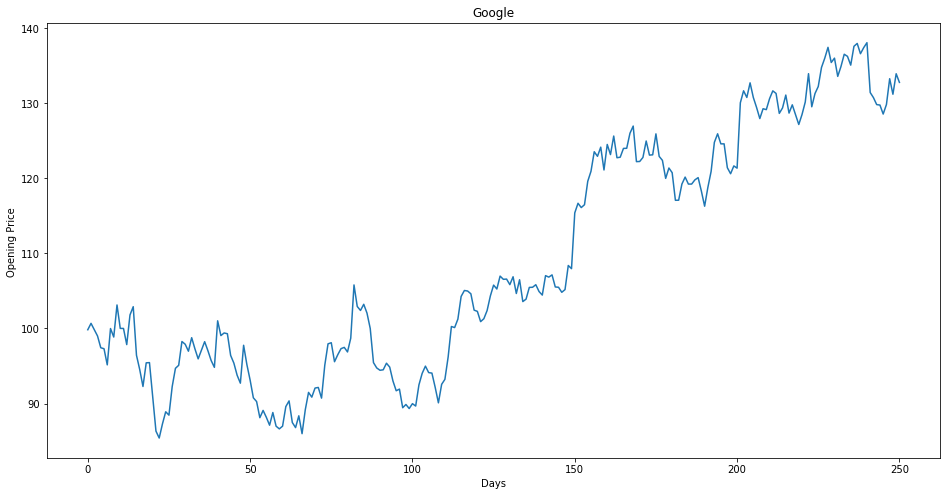

In [15]:
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Opening Price ')
plt.plot(df['Open'])
plt.show()

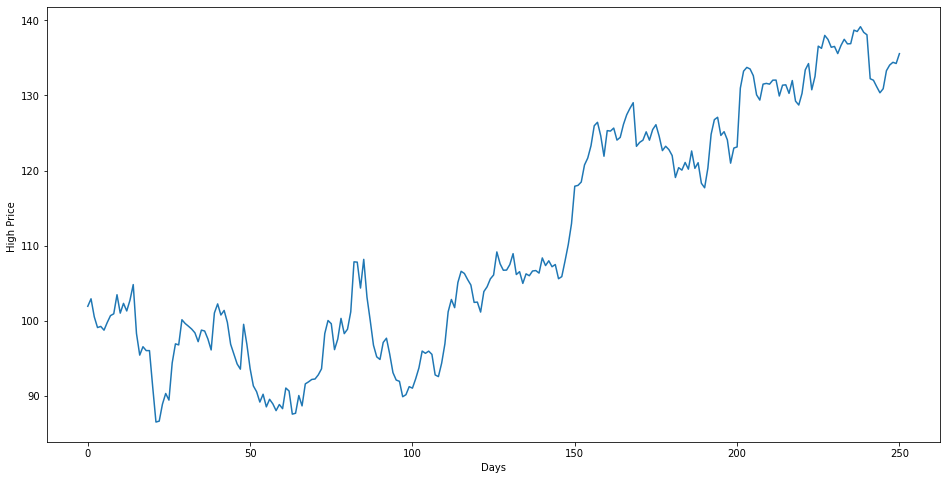

In [16]:
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('High Price ')
plt.plot(df['High'])
plt.show()

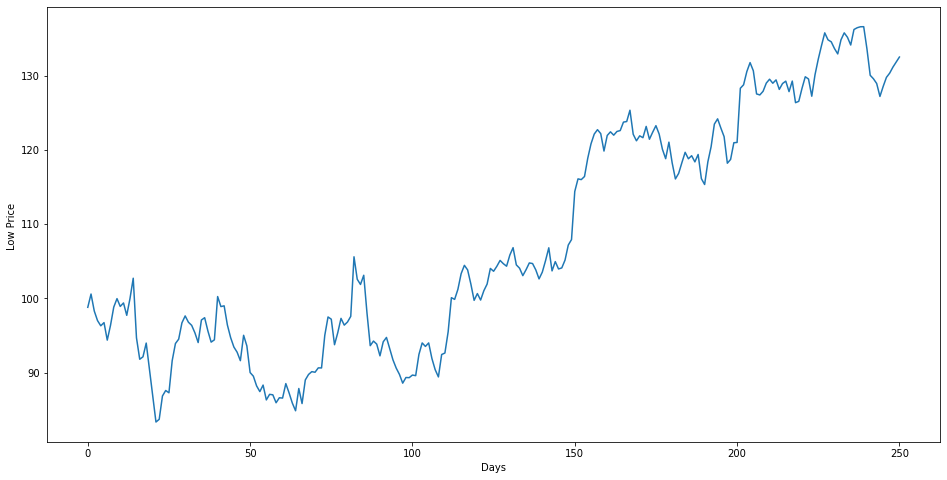

In [17]:
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Low Price ')
plt.plot(df['Low'])
plt.show()

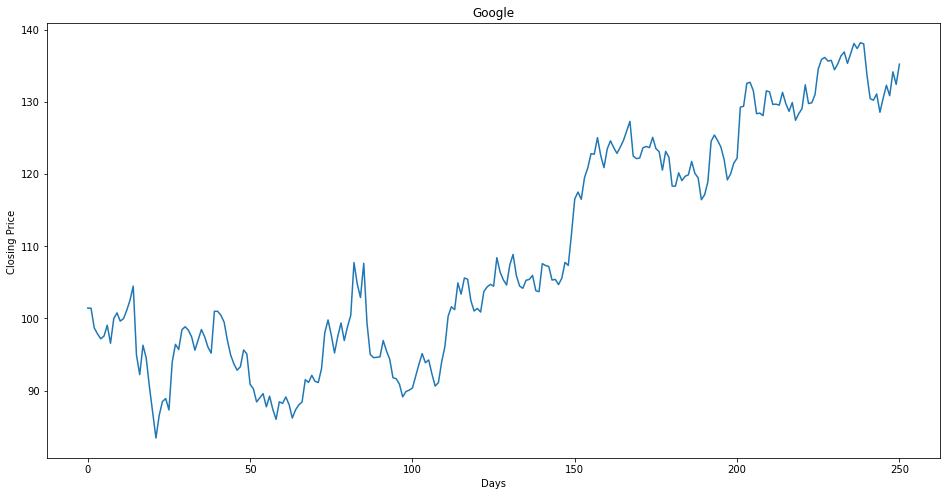

In [18]:
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Closing Price ')
plt.plot(df['Close'])
plt.show()

In [19]:
df2 = df['Close']

In [20]:
df2.head()

0    101.430000
1    101.419998
2     98.680000
3     97.860001
4     97.180000
Name: Close, dtype: float64

In [21]:
df2 = pd.DataFrame(df2)     

In [22]:
df2.head()

,Close
0,101.430000
1,101.419998
2,98.680000
3,97.860001
4,97.180000


In [23]:
future_days = 100
df2['Prediction'] = df2['Close'].shift(-future_days)

In [24]:
df2.tail()

,Close,Prediction
246,132.309998,NaN
247,130.860001,NaN
248,134.169998,NaN
249,132.429993,NaN
250,135.240005,NaN


In [25]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]


C:\Users\bhuva\AppData\Local\Temp/ipykernel_2492/3525450191.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df2.drop(['Prediction'], 1))[:-future_days]


In [26]:
y = np.array(df2['Prediction'])[:-future_days]

# Linear and Decision Tree Regression

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [32]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [33]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

C:\Users\bhuva\AppData\Local\Temp/ipykernel_2492/2356529481.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df2.drop(['Prediction'], 1)[:-future_days]


In [34]:
tree_prediction = tree.predict(x_future)

In [35]:
lr_prediction = lr.predict(x_future)

In [36]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\bhuva\AppData\Local\Temp/ipykernel_2492/4118842179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Next 100 Days

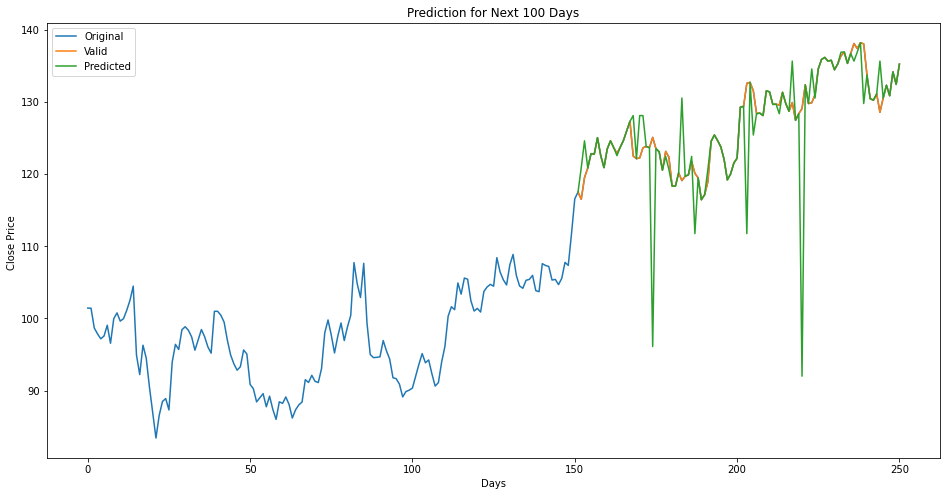

In [38]:
plt.figure(figsize=(16,8))
plt.title("Prediction for Next 100 Days")
plt.xlabel('Days')
plt.ylabel('Close Price ')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()